# Titanic dataset - kaggle competition

This is my first Kaggle competition to develop my knowledge of machine learning. We will start by importing the libraries and datasets. In this example, I have used a combination of machine learnings and a Keras deep learning models

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

2023-01-01 15:27:28.730598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's create a function for creating the confusion matrix for assessing the model

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not Survived', 'Survived']); ax.yaxis.set_ticklabels(['did not Survived', 'Survived'])

Import the datasets required

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

view sample of the files

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


statistical description of the train dataset

In [7]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


view the number of columns and rows of the datasets

In [8]:
print("test shape",test.shape)
print("train shape",train.shape)

test shape (418, 11)
train shape (891, 12)


let's create a bar chart showing the distribution of the target variable - survived

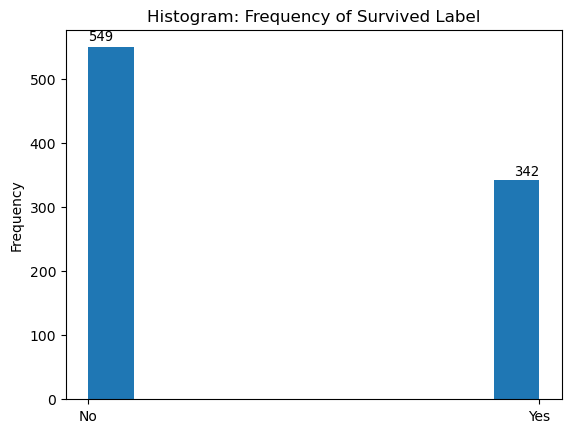

In [9]:
#train
S_lab = []

for n in train.Survived:
    if n==1:
        S_lab.append('Yes')
    else:
        S_lab.append('No')

train['Survived_Label'] = S_lab
train['Survived_Label'].head()



plt.hist(train['Survived_Label'])
plt.ylabel("Frequency")
plt.title('Histogram: Frequency of Survived Label')
plt.text('No', 560, train['Survived_Label'].value_counts()[0],
family='monospace', fontsize=10,horizontalalignment='left')
plt.text('Yes', 350, train['Survived_Label'].value_counts()[1],
family='monospace', fontsize=10,horizontalalignment='right');

<AxesSubplot:ylabel='Density'>

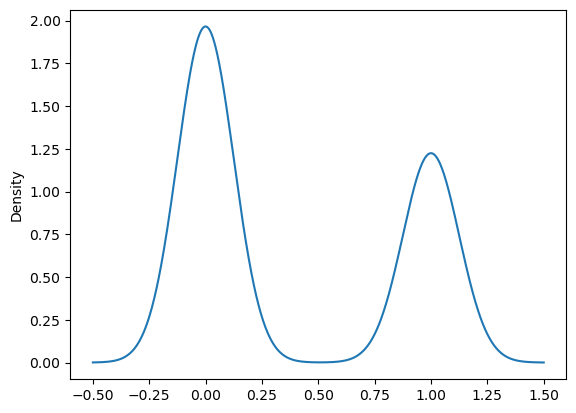

In [10]:
train.Survived.plot.density()

bell-shaped distribution 

In [11]:
train['Survived_Label'].value_counts()

No     549
Yes    342
Name: Survived_Label, dtype: int64

In the train dataset, 549 people did not survive

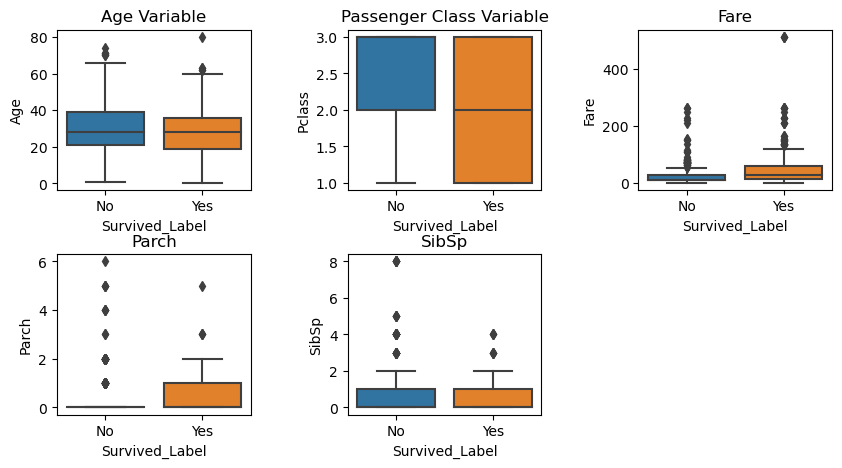

In [12]:
fig = plt.figure(figsize=(10,5))
#fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
ax= fig.add_subplot(2, 3, 1)
sns.boxplot(y=train['Age'],x=train['Survived_Label'])
ax.set_title('Age Variable')
ax1 = fig.add_subplot(2, 3, 2)
sns.boxplot(y=train['Pclass'],x=train['Survived_Label'])
ax1.set_title('Passenger Class Variable')
ax2 = fig.add_subplot(2, 3, 3)
sns.boxplot(y=train['Fare'],x=train['Survived_Label'])
ax2.set_title('Fare')
ax3 = fig.add_subplot(2, 3, 4)
sns.boxplot(y=train['Parch'],x=train['Survived_Label'])
ax3.set_title('Parch')
ax4 = fig.add_subplot(2, 3, 5)
sns.boxplot(y=train['SibSp'],x=train['Survived_Label'])
ax4.set_title('SibSp')
plt.subplots_adjust(wspace=0.5, hspace=0.4);

We can also summarize the variables and group by the survived label

**MEAN**

In [13]:
train[['Age','Pclass','Fare','Parch','SibSp']].groupby(train['Survived_Label']).mean()

,Age,Pclass,Fare,Parch,SibSp
Survived_Label,,,,,
No,30.626179,2.531876,22.117887,0.329690,0.553734
Yes,28.343690,1.950292,48.395408,0.464912,0.473684


**STANDARD DEVIATION**

In [14]:
train[['Age','Pclass','Fare','Parch','SibSp']].groupby(train['Survived_Label']).std()

,Age,Pclass,Fare,Parch,SibSp
Survived_Label,,,,,
No,14.172110,0.735805,31.388207,0.823166,1.288399
Yes,14.950952,0.863321,66.596998,0.771712,0.708688


inference from the boxplots and mean summary

**Age:** The mean age of the people that died is similar to mean of those that survived. The oldest person survived

**Pclass:** The median class of the people that died is lower than median of those that survived. it is possible that the higher the class number, the lower the quality. So more people from upper classes survived.

**Fare:** The mean fare of the people that died is lower than the mean of those that survived. It is likely that staff do not pay fare and people that paid lower fare are in lower classes. Generally, the lower the fare, the higher the chance that the passenger did not survive

In [15]:
train.Fare.duplicated().value_counts()

True     643
False    248
Name: Fare, dtype: int64

There are 643 duplicated fare in the train dataset. It is possible that fare for family package is repeated 

In [16]:
train[['Fare','SibSp']].duplicated().value_counts()

True     567
False    324
dtype: int64

This confirms that there are family pakage fares that are repeated

We can also review the categorical variables using barplot

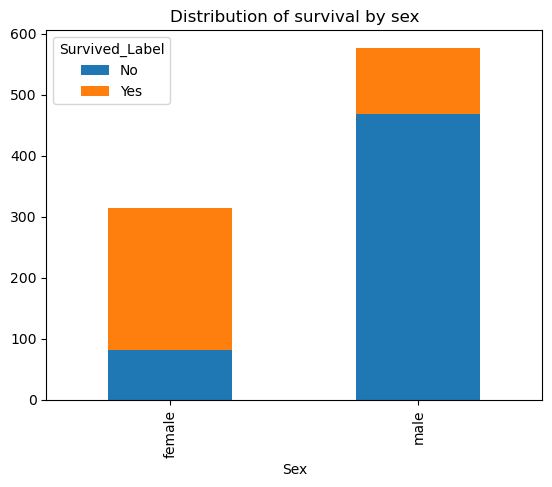

In [17]:
sex= pd.crosstab(train['Sex'], train['Survived_Label'])
sex.plot.bar(title='Distribution of survival by sex',stacked=True);

Number of female survival is higher than number of male survival
Significantly more male in the train dataset

In [18]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

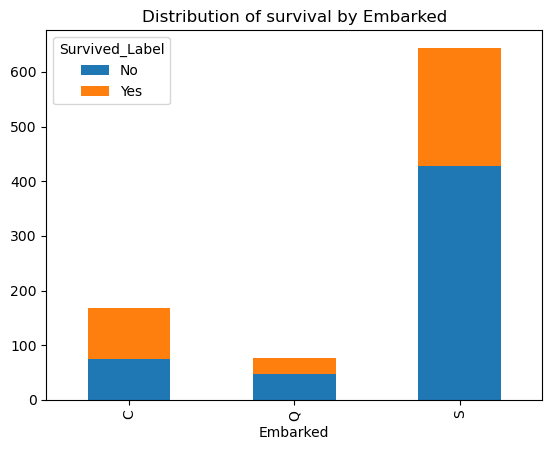

In [19]:
emb= pd.crosstab(train['Embarked'], train['Survived_Label'])
emb.plot.bar(title='Distribution of survival by Embarked',stacked=True);

The tickets and Cabin variables have too many non-unique values that do not provide any insight. Let's figure out how to optimize these variables for machine learning

Deck variable from Cabin

In [20]:
train['Cabin']=train['Cabin'].str.split('', expand=True)[1]+train['Cabin'].str.split('', expand=True)[2]
test['Cabin']=test['Cabin'].str.split('', expand=True)[1]+test['Cabin'].str.split('', expand=True)[2]

train['Deck']=train['Cabin'].str.split('', expand=True)[1]
test['Deck']=test['Cabin'].str.split('', expand=True)[1]
#print(train['Cabin'].value_counts())
#print(test['Cabin'].value_counts())


In [21]:
train.Deck = train.Deck.replace('T',np.nan)
print(train['Deck'].unique())
print(train['Deck'].value_counts())
print(test['Deck'].value_counts())

[None 'C' 'E' 'G' 'D' 'A' 'B' 'F' nan]
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: Deck, dtype: int64
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Deck, dtype: int64


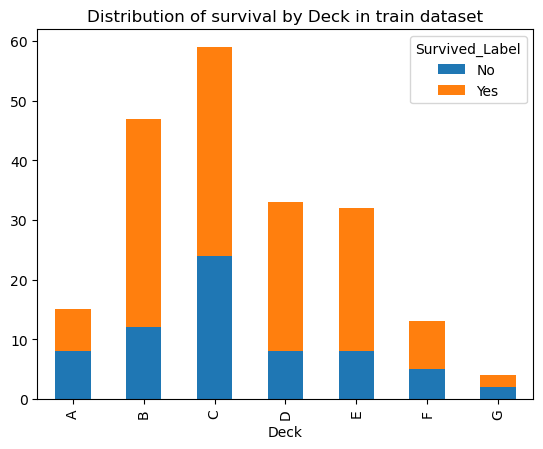

In [22]:
#fig = plt.figure(figsize=(14,8))
#fig, axes = plt.subplots(1, 2, sharey=True)
deck= pd.crosstab(train['Deck'], train['Survived_Label'])
#ax1=fig.add_subplot(1, 2, 1)
deck.plot.bar(title='Distribution of survival by Deck in train dataset',stacked=True);
#deck1= pd.crosstab(test['Deck'])
#ax1=fig.add_subplot(1, 2, 2)

let's replace nulls values in the age feature with mean values and replace the Cabin null values with unknown

In [23]:
train.Cabin = train.Cabin.fillna('Unknown')
test.Cabin = test.Cabin.fillna('Unknown')
train.Deck = train.Deck.fillna('C')
test.Deck = test.Deck.fillna('C') 

train['Age'].replace(np.nan,train['Age'].median(), inplace=True)

test['Age'].replace(np.nan,test['Age'].median(), inplace=True)

train['Fare'].replace(np.nan,train['Fare'].mean(), inplace=True)

test['Fare'].replace(np.nan,test['Fare'].mean(), inplace=True)
train['Embarked'].replace(np.nan,'S', inplace=True)

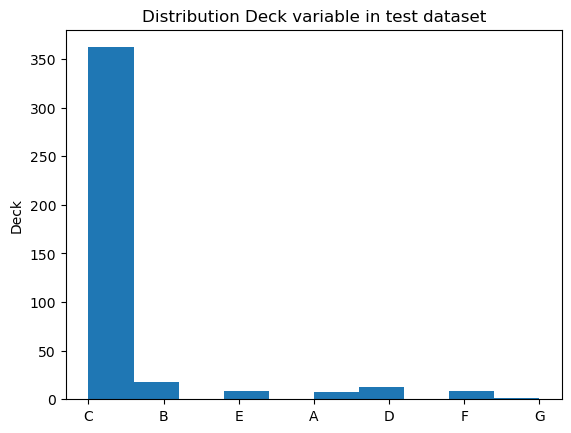

In [24]:
plt.hist(test['Deck'])
plt.ylabel('Deck')
plt.title('Distribution Deck variable in test dataset');

We can separate out the title from the name variable

In [25]:


train['Title']=train['Name'].str.split(' ', expand=True)[1]
test['Title']=test['Name'].str.split(' ', expand=True)[1]
def replace_titles(x):
    if x['Title'] in ['Miss.','Mlle.', 'Ms.']:
        return 'Miss'
    if x['Title']=='Master.':
        return 'Master'
    if x['Sex']=='male':
        return 'Mr'
    else:
        return 'Mrs'
train['Title']=train.apply(replace_titles, axis=1)
test['Title']=test.apply(replace_titles, axis=1)

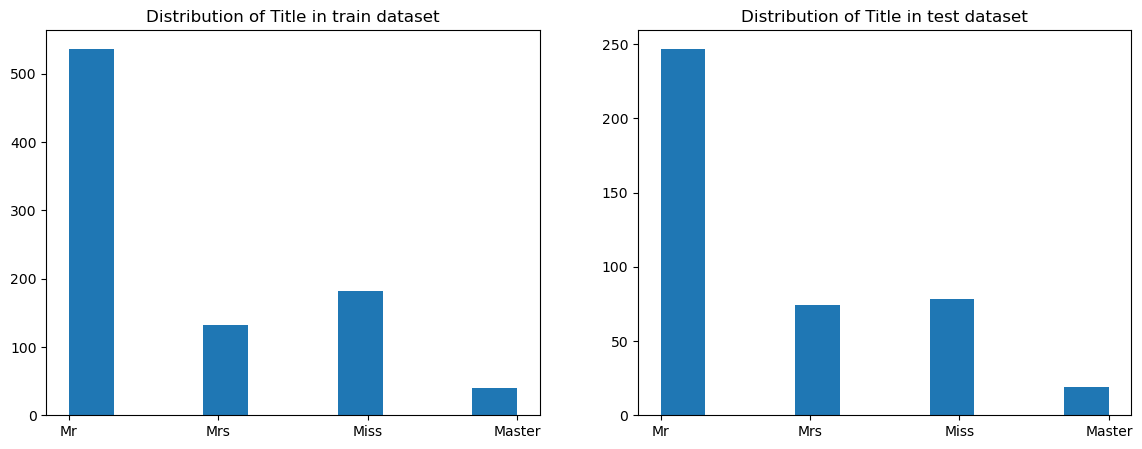

In [26]:
fig = plt.figure(figsize=(14,5))
ax= fig.add_subplot(1, 2, 1)
plt.hist(train['Title'])
ax.set_title('Distribution of Title in train dataset')
ax1 = fig.add_subplot(1, 2, 2)
plt.hist(test['Title'])
ax1.set_title('Distribution of Title in test dataset');

Let's create a variable that show common last names in the train and test dataset

In [27]:
train['Name']=train['Name'].str.split(' ', expand=True)[0]
test['Name']=test['Name'].str.split(' ', expand=True)[0]

In [28]:
train.Name.astype('str')
test.Name.astype('str')
cb = []
for i in train['Name']:
    if i in np.sort(test['Name']):
        cb.append(i)
    else:
        i='Unknown'
        cb.append(i)
train['Name'] = cb

cb1 = []
for i in test['Name']:
    if i in np.sort(train['Name']):
        cb1.append(i)
    else:
        i='Unknown'
        cb1.append(i)
test['Name'] = cb1

print(np.sort(train['Name'].unique()))
print(np.sort(test['Name'].unique()))

['Abbott,' 'Aks,' 'Allison,' 'Andersson,' 'Andrew,' 'Angle,' 'Asplund,'
 'Astor,' 'Becker,' 'Betros,' 'Bonnell,' 'Boulos,' 'Bowen,' 'Bradley,'
 'Brown,' 'Bryhl,' 'Burns,' 'Cacic,' 'Caldwell,' 'Canavan,' 'Caram,'
 'Cardeza,' 'Carlsson,' 'Carr,' 'Carrau,' 'Cavendish,' 'Chaffee,'
 'Chapman,' 'Christy,' 'Chronopoulos,' 'Clarke,' 'Compton,' 'Connolly,'
 'Cook,' 'Cor,' 'Coutts,' 'Cribb,' 'Crosby,' 'Cumings,' 'Daly,' 'Danbom,'
 'Davidson,' 'Davies,' 'Davison,' 'Dean,' 'Dennis,' 'Dodge,' 'Douglas,'
 'Drew,' 'Duran' 'Elias,' 'Faunthorpe,' 'Fleming,' 'Ford,' 'Fortune,'
 'Fox,' 'Frauenthal,' 'Frolicher-Stehli,' 'Gale,' 'Giles,' 'Goldsmith,'
 'Goodwin,' 'Greenfield,' 'Hansen,' 'Harder,' 'Hays,' 'Herman,'
 'Hirvonen,' 'Hocking,' 'Hold,' 'Ilmakangas,' 'Johansson,' 'Johnston,'
 'Jonsson,' 'Karlsson,' 'Karun,' 'Keane,' 'Kelly,' 'Kenyon,' 'Kiernan,'
 'Kimball,' 'Kink,' 'Kink-Heilmann,' 'Klasen,' 'Lahtinen,' 'Laroche,'
 'Lefebre,' 'Lennon,' 'Lindell,' 'Lines,' 'Louch,' 'Mallet,' 'Marvin,'
 'McCarthy,' '

In addition to the newly created Deck variable, we can capture common cabins (first two characters) in train and test datasets 

In [29]:
train.Cabin.astype('str')
test.Cabin.astype('str')
cb = []
for i in train['Cabin']:
    if i in np.sort(test['Cabin']):
        cb.append(i)
    else:
        i='Unknown'
        cb.append(i)
train['Cabin'] = cb

cb1 = []
for i in test['Cabin']:
    if i in np.sort(train['Cabin']):
        cb1.append(i)
    else:
        i='Unknown'
        cb1.append(i)
test['Cabin'] = cb1

print(np.sort(train['Cabin'].unique()))
print(np.sort(test['Cabin'].unique()))

['A1' 'A2' 'A3' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'C1' 'C2' 'C3' 'C4'
 'C5' 'C6' 'C7' 'C8' 'C9' 'D' 'D1' 'D2' 'D3' 'D4' 'E3' 'E4' 'E5' 'E6' 'F '
 'F2' 'F3' 'F4' 'G6' 'Unknown']
['A1' 'A2' 'A3' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'C1' 'C2' 'C3' 'C4'
 'C5' 'C6' 'C7' 'C8' 'C9' 'D' 'D1' 'D2' 'D3' 'D4' 'E3' 'E4' 'E5' 'E6' 'F '
 'F2' 'F3' 'F4' 'G6' 'Unknown']


repeat above step for ticket variable

In [30]:
train.Ticket.astype('str')
test.Ticket.astype('str')
cb = []
for i in train['Ticket']:
    if i in np.sort(test['Ticket']):
        cb.append(i)
    else:
        i='Unknown'
        cb.append(i)
train['Ticket'] = cb

cb1 = []
for i in test['Ticket']:
    if i in np.sort(train['Ticket']):
        cb1.append(i)
    else:
        i='Unknown'
        cb1.append(i)
test['Ticket'] = cb1

print(np.sort(train['Ticket'].unique()))
print(np.sort(test['Ticket'].unique()))

['110813' '112058' '113059' '113503' '113509' '113773' '113781' '113796'
 '11753' '11765' '11767' '11769' '11813' '12749' '13567' '1601' '16966'
 '17463' '17464' '19877' '19928' '19950' '2003' '220845' '226875' '228414'
 '230136' '236853' '237789' '24160' '244358' '248738' '250651' '2625'
 '26360' '2650' '2653' '2661' '2662' '2668' '26707' '2678' '2680' '2689'
 '28220' '28664' '29103' '29105' '2926' '29750' '3101295' '3101298'
 '315153' '33638' '345572' '345763' '347077' '347080' '349256' '349909'
 '349910' '350026' '364498' '36568' '367226' '36928' '370129' '370371'
 '371362' '376566' '382652' '386525' '392091' '4133' 'A/4 48871'
 'A/5. 3337' 'A/5. 851' 'C 4001' 'C.A. 2315' 'C.A. 2673' 'C.A. 33112'
 'C.A. 33595' 'C.A. 34651' 'C.A. 37671' 'C.A. 6212' 'CA 2144' 'CA. 2343'
 'F.C. 12750' 'F.C.C. 13528' 'PC 17483' 'PC 17558' 'PC 17569' 'PC 17585'
 'PC 17592' 'PC 17597' 'PC 17599' 'PC 17603' 'PC 17608' 'PC 17755'
 'PC 17756' 'PC 17757' 'PC 17758' 'PC 17759' 'PC 17760' 'PC 17761'
 'PP 9549' 

Create an Age Group variable to see if survival depends on the age group of the passenger

In [31]:
def Age_Group(x):
    if x['Age'] <= 20:
        return 1
    if x['Age'] <= 40 and x['Age']> 20:
        return 2
    else:
        return 3

train['Age_Group']=train.apply(Age_Group, axis=1)*train['Pclass']
test['Age_Group']=test.apply(Age_Group, axis=1)*test['Pclass']

def Sex_number(x):
    if x['Sex'] == 'Male':
        return 1
    else:
        return 2

train['Sex_number']=train.apply(Sex_number, axis=1)*train['Pclass']
test['Sex_number']=test.apply(Sex_number, axis=1)*test['Pclass']

train['Age_Group']=train['Age_Group']*train['Pclass']
test['Age_Group']=test['Age_Group']*test['Pclass']

train['Age_Sex'] = train['Age_Group']*train['Sex_number']
test['Age_Sex'] = test['Age_Group']*test['Sex_number']

Further iteration to improve model's performance

In [32]:
train['Title']=train['Title']+train['Deck']+train['Sex']
test['Title']=test['Title']+test['Deck']+test['Sex']
#print(train['Title'].unique())
#print(test['Title'].unique())

In [33]:
train['Age2']=np.log(train['Age'])
test['Age2']=np.log(test['Age'])

#train['Fare2']=train['Fare']**2 * train['Age']**2
#test['Fare2']= test['Fare']**2 * test['Age']**2

In [34]:
train['Age3']=train['Age']**2
test['Age3']=test['Age']**2

train['Fare3']=train['Fare']**2
test['Fare3']=test['Fare']**2

In [35]:
print(train.Embarked.unique())
print(test.Embarked.unique())

['S' 'C' 'Q']
['Q' 'S' 'C']


Final check to ensure that the null values have been replaced 

In [36]:
print('train',train.isnull().sum())
print('test',test.isnull().sum())

train PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Survived_Label    0
Deck              0
Title             0
Age_Group         0
Sex_number        0
Age_Sex           0
Age2              0
Age3              0
Fare3             0
dtype: int64
test PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
Title          0
Age_Group      0
Sex_number     0
Age_Sex        0
Age2           0
Age3           0
Fare3          0
dtype: int64


Final check of the datatype of the train and test data

In [37]:
print("train datatype",train.dtypes)
print("test datatype",test.dtypes)

train datatype PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Survived_Label     object
Deck               object
Title              object
Age_Group           int64
Sex_number          int64
Age_Sex             int64
Age2              float64
Age3              float64
Fare3             float64
dtype: object
test datatype PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Deck            object
Title           object
Age_Group        int64
Sex_number       int64
Age_Sex          int64
Age2           float64
Age3           float

Further iteration to improve model performance. Create a variable to address family package Fare

In [38]:

#    Fare per person
for df in [train, test]:
    #Creating new family_size column
    df['Family_Size']=df['SibSp']+df['Parch']
    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)
    #return [train,test]
    #Age times class
for df in [train, test]:
    df['Age*Class']=df['Age']*df['Pclass']
    #return [train,test]

In [39]:
print("test shape",test.shape)
print("train shape",train.shape)

test shape (418, 22)
train shape (891, 24)


sample of the train dataset after all the changes 

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Age_Group,Sex_number,Age_Sex,Age2,Age3,Fare3,Family_Size,Fare_Per_Person,Age*Class
0,1,0,3,Unknown,male,22.0,1,0,Unknown,7.2500,...,MrCmale,18,6,108,3.091042,484.0,52.562500,1,3.62500,66.0
1,2,1,1,"Cumings,",female,38.0,1,0,PC 17599,71.2833,...,MrsCfemale,2,2,4,3.637586,1444.0,5081.308859,1,35.64165,38.0
2,3,1,3,Unknown,female,26.0,0,0,Unknown,7.9250,...,MissCfemale,18,6,108,3.258097,676.0,62.805625,0,7.92500,78.0
3,4,1,1,Unknown,female,35.0,1,0,Unknown,53.1000,...,MrsCfemale,2,2,4,3.555348,1225.0,2819.610000,1,26.55000,35.0
4,5,0,3,Unknown,male,35.0,0,0,Unknown,8.0500,...,MrCmale,18,6,108,3.555348,1225.0,64.802500,0,8.05000,105.0


Further iteration: Scale the numerical variables. Try different scaler option

In [41]:
#train.corr()
train['Age']=(train['Age']-train['Age'].mean())/train['Age'].std()
train['Age2']=(train['Age2']-train['Age2'].mean())/train['Age2'].std()
train['Fare']=(train['Fare']-train['Fare'].mean())/train['Fare'].std()
#train['Fare2']=(train['Fare2']-train['Fare2'].mean())/train['Fare2'].std()
train['Fare_Per_Person']=(train['Fare_Per_Person']-train['Fare_Per_Person'].mean())/train['Fare_Per_Person'].std()
train['Age*Class']=(train['Age*Class']-train['Age*Class'].mean())/train['Age*Class'].std()

train['Age3']=(train['Age3']-train['Age3'].mean())/train['Age3'].std()
train['Fare3']=(train['Fare3']-train['Fare3'].mean())/train['Fare3'].std()

In [42]:
test['Age']=(test['Age']-test['Age'].mean())/test['Age'].std()
test['Age2']=(test['Age2']-test['Age2'].mean())/test['Age2'].std()
test['Fare']=(test['Fare']-test['Fare'].mean())/test['Fare'].std()

#test['Fare2']=(test['Fare2']-test['Fare2'].mean())/test['Fare2'].std()
test['Age3']=(test['Age3']-test['Age3'].mean())/test['Age3'].std()
test['Fare3']=(test['Fare3']-test['Fare3'].mean())/test['Fare3'].std()

test['Fare_Per_Person']=(test['Fare_Per_Person']-test['Fare_Per_Person'].mean())/test['Fare_Per_Person'].std()
test['Age*Class']=(test['Age*Class']-test['Age*Class'].mean())/test['Age*Class'].std()

Use label encoder to transform the categorical data

In [43]:
train['Name']=preprocessing.LabelEncoder().fit_transform(train['Name'])
train['Ticket']=preprocessing.LabelEncoder().fit_transform(train['Ticket'])
train['Cabin']=preprocessing.LabelEncoder().fit_transform(train['Cabin'])
#train['Age2']=preprocessing.LabelEncoder().fit_transform(train['Age2'])
train['Age_Sex']=preprocessing.LabelEncoder().fit_transform(train['Age_Sex'])
train['Age_Group']=preprocessing.LabelEncoder().fit_transform(train['Age_Group'])
train['Sex']=preprocessing.LabelEncoder().fit_transform(train['Sex'])
train['Embarked']=preprocessing.LabelEncoder().fit_transform(train['Embarked'])
train['Deck']=preprocessing.LabelEncoder().fit_transform(train['Deck'])
train['Title']=preprocessing.LabelEncoder().fit_transform(train['Title'])

In [44]:
#train['Ticket']=(train['Ticket']-train['Ticket'].mean())/train['Ticket'].std()
#train['Name']=(train['Name']-train['Name'].mean())/train['Name'].std()

Final correlation to understand the importance of each variable 

In [45]:

df= pd.DataFrame(np.abs(train[train.columns[1:]].corr()['Survived'][1:]))
df.sort_values('Survived',ascending=False,inplace=True)
df

/var/folders/m3/zdnmwkys4t39w0shnmxnj0340000gn/T/ipykernel_5289/1366878709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df= pd.DataFrame(np.abs(train[train.columns[1:]].corr()['Survived'][1:]))


,Survived
Sex,0.543351
Age_Sex,0.368062
Age_Group,0.364385
Pclass,0.338481
Sex_number,0.338481
Age*Class,0.324559
Fare,0.257307
Cabin,0.242488
Fare_Per_Person,0.221600
Embarked,0.167675


In [46]:
#sns.pairplot(train[train.columns[1:]])

In [47]:
#from sklearn.neighbors import LocalOutlierFactor

#clf = LocalOutlierFactor(contamination = 0.02)
# identify outliers:
#outliers = clf.fit_predict(train)
# Remove outliers where 1 represent inliers and -1 represent outliers:
#train = train[np.where(outliers == 1, True, False)]
#train.shape

Iteration: using integer dtype for the target variable

In [48]:
train_Y = train['Survived'].astype('float')
print(train_Y.shape)
print(train_Y.dtype)
train_Y2 = to_categorical(train_Y, num_classes=2,dtype='float64')
train_Y2.shape
train_Y2=train_Y2.astype('int')
train_Y = train['Survived'].to_numpy()
train_Y=train_Y.astype('int')

(891,)
float64


Machine Learning models split

In [49]:
#train_x, x_val,train_Y, y_val = train_test_split(train_x,train_Y,test_size=0.1)

In [50]:

#train_Y = to_categorical(train_Y,-1)
#train_Y.shape

In [51]:
test['Name']=preprocessing.LabelEncoder().fit_transform(test['Name'])
test['Ticket']=preprocessing.LabelEncoder().fit_transform(test['Ticket'])
test['Cabin']=preprocessing.LabelEncoder().fit_transform(test['Cabin'])
#test['Age2']=preprocessing.LabelEncoder().fit_transform(test['Age2'])
test['Age_Sex']=preprocessing.LabelEncoder().fit_transform(test['Age_Sex'])
test['Age_Group']=preprocessing.LabelEncoder().fit_transform(test['Age_Group'])
test['Sex']=preprocessing.LabelEncoder().fit_transform(test['Sex'])
test['Embarked']=preprocessing.LabelEncoder().fit_transform(test['Embarked'])
test['Deck']=preprocessing.LabelEncoder().fit_transform(test['Deck'])
test['Title']=preprocessing.LabelEncoder().fit_transform(test['Title'])

In [52]:
train_x = train[df.index[0:12]]
test_x = test[df.index[0:12]]


In [53]:
#test['Ticket']=(test['Ticket']-test['Ticket'].mean())/test['Ticket'].std()
#test['Name']=(test['Name']-test['Name'].mean())/test['Name'].std()

In [54]:
train_x.shape

(891, 12)

In [55]:
test_x.shape

(418, 12)

In [56]:
train_x1=transform = preprocessing.StandardScaler().fit(train_x).transform(train_x)
n=train_x.shape[1]
print(n)
print(train_x.head())

12
   Sex  Age_Sex  Age_Group  Pclass  Sex_number  Age*Class      Fare  Cabin  \
0    1        7          7       3           6   0.058791 -0.502163     33   
1    0        1          1       1           2  -0.802891  0.786404     17   
2    0        7          7       3           6   0.428084 -0.488580     33   
3    0        1          1       1           2  -0.895215  0.420494     10   
4    1        7          7       3           6   1.258992 -0.486064     33   

   Fare_Per_Person  Embarked  Ticket     Fare3  
0        -0.454543         2     112 -0.199193  
1         0.438748         0      95  0.091050  
2        -0.334569         2     112 -0.198602  
3         0.185083         2     112 -0.039488  
4        -0.331081         2     112 -0.198486  


In [57]:
Kera model data split

SyntaxError: invalid syntax (160980049.py, line 1)

In [ ]:
train_x1, x_val1,train_Y2, y_val1 = train_test_split(train_x1,train_Y2,test_size=0.1)

In [ ]:
test_x1=transform = preprocessing.StandardScaler().fit(test_x).transform(test_x)
print(test_x.head())

In [ ]:
import tensorflow as tf
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(n, activation='relu', input_shape=(n,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[['accuracy', 'mse']])
    return model

# build the model
model = classification_model()


# fit the model
model.fit(train_x1, train_Y2,epochs=1000,validation_split=0.10)

# evaluate the model
#print(accuracy_score(train_Y, model.predict(x_val)))

# predict test data
test_y=model.predict(test_x1)
yhat = model.predict(x_val1)
yhat_2 = []
for i,j in yhat:
        yhat_2.append(j)
# do matrix for train
plot_confusion_matrix(y_val1,np.round(yhat_2,0))

In [ ]:
test_y2 = []
for i,j in test_y:
        test_y2.append(j)
print(np.round(test_y2,0).astype('int'))
kera = test['PassengerId'].to_numpy()
result = {'PassengerId':kera,'Survived':np.round(test_y2,0).astype('int')}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv3_kera.csv")

In [ ]:
#use gridsearch
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr, parameters,cv=10)
logreg_cv.fit(train_x,train_Y)

#print accuracy of best model
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


# predict test data
test_y=logreg_cv.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,logreg_cv.predict(x_val))


In [ ]:
psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_log.csv")

In [ ]:
#use gridsearch
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv=GridSearchCV(tree, parameters,cv=10)
tree_cv.fit(train_x,train_Y)

#print accuracy of best model
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)


# predict test data
test_y=tree_cv.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,tree_cv.predict(x_val))

In [ ]:
psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_tree.csv")

In [ ]:
#use gridsearch
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
KNN_cv=GridSearchCV(KNN, parameters,cv=10)
KNN_cv.fit(train_x,train_Y)

#print accuracy of best model
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)


# predict test data
test_y=KNN_cv.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,KNN_cv.predict(x_val))

In [ ]:
psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_knn.csv")

In [ ]:
#use gridsearch
parameters = { 
            "n_estimators"      : [10,50,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


xgb=XGBClassifier()
rdf = RandomForestClassifier()



rdf_cv=GridSearchCV(rdf, parameters,cv=10)
rdf_cv.fit(train_x,train_Y)

#print accuracy of best model
print("tuned hpyerparameters :(best parameters) ",rdf_cv.best_params_)
print("accuracy :",rdf_cv.best_score_)


# predict test data
test_y=rdf_cv.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,rdf_cv.predict(x_val))

psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_rdf.csv")

In [ ]:
#use gridsearch
parameters = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


xgb=XGBClassifier()




xgb_cv=GridSearchCV(xgb, parameters,cv=10)
xgb_cv.fit(train_x,train_Y)

#print accuracy of best model
print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)
print("accuracy :",xgb_cv.best_score_)


# predict test data
test_y=xgb_cv.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,xgb_cv.predict(x_val))

psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_xgb.csv")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

xgb=XGBClassifier()
rdf = RandomForestClassifier()
svm = SVC()
#('knn', KNN), ('tree', tree), 
final_model = VotingClassifier(
    estimators=[('xgb', xgb),('rdf', rdf)], 
    voting='hard',n_jobs=-1,flatten_transform=True)
 
# training all the model on the train dataset
final_model.fit(train_x,train_Y)

# predict test data
test_y=final_model.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,final_model.predict(x_val))

psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_ens.csv")

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
#train bag model on 80% of sample data
#bag = BaggingClassifier(tree, n_estimators=100,
#                        max_samples=0.7,random_state=1)

parameters = {'base_estimator': [tree],
              'n_estimators': [10, 20, 40, 100],
              #'max_samples': [0, 1],
              #'max_features': [0, 1],
              'bootstrap': ['True','False'],
              'bootstrap_features': ['True','False'],
              'warm_start': ['True','False']                                  
             }

bag_cv=GridSearchCV(bag, parameters,cv=10)
bag_cv.fit(train_x,train_Y)

#print accuracy of best model
print("tuned hpyerparameters :(best parameters) ",bag_cv.best_params_)
print("accuracy :",bag_cv.best_score_)

# predict test data
test_y=bag_cv.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,bag_cv.predict(x_val))



In [ ]:
psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_bag.csv")

In [ ]:
#use gridsearch
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'gamma': ['scale', 'auto'],
              'C':np.linspace(0.1,10,5),
              #'coef0':np.linspace(-1,1,5),
              'max_iter' : [-1]
             }
svm = SVC()
svm_cv=GridSearchCV(svm, parameters,cv=10)
svm_cv.fit(train_x1,train_Y)

#print accuracy of best model
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)


# predict test data
test_y=svm_cv.predict(test_x1)

# do matrix for train
plot_confusion_matrix(y_val,svm_cv.predict(train_x1))

psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_svm.csv")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

xgb=XGBClassifier()
rdf = RandomForestClassifier()
svm = SVC()
#('knn', KNN), ('tree', tree), 
final_model = VotingClassifier(
    estimators=[('xgb', xgb_cv),('rdf', rdf_cv)], 
    voting='hard',n_jobs=-1,flatten_transform=True)
 
# training all the model on the train dataset
final_model.fit(train_x,train_Y)

# predict test data
test_y=final_model.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,final_model.predict(x_val))

psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_ens3.csv")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

xgb=XGBClassifier()
rdf = RandomForestClassifier()
svm = SVC()
#('knn', KNN), ('tree', tree), 
final_model = VotingClassifier(
    estimators=[('xgb', xgb),('rdf', rdf),('bag', bag)], 
    voting='hard',n_jobs=-1,flatten_transform=True)
 
# training all the model on the train dataset
final_model.fit(train_x,train_Y)

# predict test data
test_y=final_model.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,final_model.predict(x_val))

psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_ens4.csv")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

xgb=XGBClassifier()
rdf = RandomForestClassifier()
svm = SVC()
#('knn', KNN), ('tree', tree), 
final_model = VotingClassifier(
    estimators=[('xgb', xgb_cv),('rdf', rdf_cv),('bag', bag_cv)], 
    voting='hard',n_jobs=-1,flatten_transform=True)
 
# training all the model on the train dataset
final_model.fit(train_x,train_Y)

# predict test data
test_y=final_model.predict(test_x)

# do matrix for train
plot_confusion_matrix(y_val,final_model.predict(x_val))

psg = test['PassengerId'].to_numpy()
result = {'PassengerId':psg,'Survived':np.round(test_y,0)}
print(pd.DataFrame(result).shape)
pd.DataFrame(result).set_index('PassengerId').to_csv("titanicv2_ens5.csv")